In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle as pkl

from google.colab import drive
user_name = '/content/drive'
drive.mount(user_name, force_remount=True)


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## 1. ES Baselines

In [2]:
def moving_average(a, n=3,diff=False):
    if diff==True:
      for i in range(len(a)):
        a[i] = np.mean(a[i].cpu().numpy(),0)
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

In [3]:
def clean_sac(input,sac_issue=False):
  new_list = []
  if sac_issue==True:
    for i in range(len(input)):
      if input[i]>input[i-1]:
        new_list.append(input[i])
  else:
    for i in range(len(input)):
      if input[i]<input[i-1] and (input[i-1]-input[i]>2):
        new_list.append(input[i-1])

  return new_list


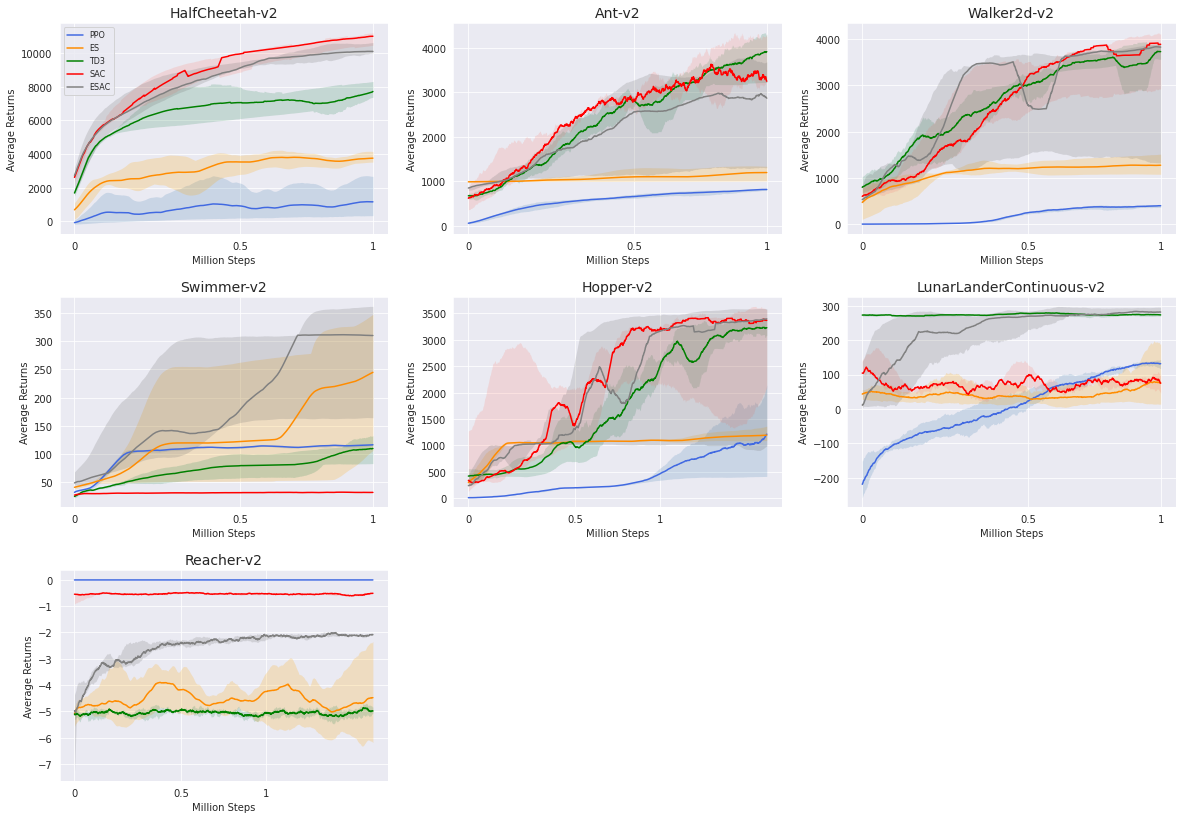

In [7]:

es_name = '/content/drive/My Drive/Colab Notebooks/Checkpoint/ES/'
ppo_name = '/content/drive/My Drive/Colab Notebooks/Checkpoint/PPO/'
td3_name = '/content/drive/My Drive/Colab Notebooks/Checkpoint/TD3/'
sac_name = '/content/drive/My Drive/Colab Notebooks/Checkpoint/SAC/'
esac_name = '/content/drive/My Drive/Colab Notebooks/Checkpoint/ESAC/'
checkpoint_name = '/content/drive/My Drive/Colab Notebooks/Checkpoint/'

lengthy = ['Hopper-v2','Pusher-v2','Reacher-v2']
diff_tens = ['Reacher-v2']

env_list = ['HalfCheetah-v2','Ant-v2','Walker2d-v2','Swimmer-v2','Hopper-v2','LunarLanderContinuous-v2','Reacher-v2'] #,'Ant-v2'
sns.set_style('dark', {'axes.grid' : True})
alpha = 0.2
avg = 100
fig = plt.figure(figsize=(20,24))
fig.subplots_adjust(hspace=0.3)
num_plots = 2*len(env_list)

count = 0
for env_name in env_list:
    k = 'avg_reward'
    diff = False
    sac_issue = False

    count += 1
    if env_name in lengthy:
      y = 0
      x = 1500
    else:
      y = 0
      x = 1000
    

    if env_name in diff_tens:
      diff = True
    if env_name=='Reacher-v2':
      sac_issue = True
      k = 'avg_rewards'

    data_ppo_1 = moving_average(pkl.load(open(ppo_name+env_name+'/v1'+'/data.pkl','rb'))[k][y:x],avg,diff)
    data_ppo_2 = moving_average(pkl.load(open(ppo_name+env_name+'/v2'+'/data.pkl','rb'))[k][y:x],avg,diff)
    data_ppo_3 = moving_average(pkl.load(open(ppo_name+env_name+'/v3'+'/data.pkl','rb'))[k][y:x],avg,diff)
    data_es_1 = moving_average(pkl.load(open(es_name+env_name+'/v1'+'/data.pkl','rb'))['max_rewards'][:x],avg)
    data_es_2 = moving_average(pkl.load(open(es_name+env_name+'/v2'+'/data.pkl','rb'))['max_rewards'][:x],avg)
    data_es_3 = moving_average(pkl.load(open(es_name+env_name+'/v3'+'/data.pkl','rb'))['max_rewards'][:x],avg)
    data_td3_1 = moving_average(pkl.load(open(td3_name+env_name+'/v1'+'/data.pkl','rb'))['avg_reward'][-x:],avg)
    data_td3_2 = moving_average(pkl.load(open(td3_name+env_name+'/v2'+'/data.pkl','rb'))['avg_reward'][-x:],avg)
    data_td3_3 = moving_average(pkl.load(open(td3_name+env_name+'/v3'+'/data.pkl','rb'))['avg_reward'][-x:],avg)
    data_sac_1 = moving_average(clean_sac(pkl.load(open(sac_name+env_name+'/v1'+'/data.pkl','rb'))['avg_reward'],sac_issue)[-x:],avg)
    data_sac_2 = moving_average(clean_sac(pkl.load(open(sac_name+env_name+'/v2'+'/data.pkl','rb'))['avg_reward'],sac_issue)[-x:],avg)
    data_sac_3 = moving_average(clean_sac(pkl.load(open(sac_name+env_name+'/v3'+'/data.pkl','rb'))['avg_reward'],sac_issue)[-x:],avg)
    data_esac_1 = moving_average(pkl.load(open(esac_name+env_name+'/v1'+'/data.pkl','rb'))['max_rewards'][:x],avg)
    data_esac_2 = moving_average(pkl.load(open(esac_name+env_name+'/v2'+'/data.pkl','rb'))['max_rewards'][:x],avg)
    data_esac_3 = moving_average(pkl.load(open(esac_name+env_name+'/v3'+'/data.pkl','rb'))['max_rewards'][:x],avg)
    
    max_ppo = [];min_ppo = [];avg_ppo = []
    max_es = [];min_es = [];avg_es = []
    max_td3 = [];min_td3 = [];avg_td3 = []
    max_sac = [];min_sac = [];avg_sac = []
    max_esac = [];min_esac = [];avg_esac = []
    
    for i in range(len(data_ppo_1)):
      temp_sac = [data_sac_1[i],data_sac_2[i],data_sac_3[i]]
      temp_esac = [data_esac_1[i],data_esac_2[i],data_esac_3[i]]
      max_ppo.append(max(data_ppo_1[i],data_ppo_2[i],data_ppo_3[i]))
      min_ppo.append(min(data_ppo_1[i],data_ppo_2[i],data_ppo_3[i]))
      avg_ppo.append(np.mean([data_ppo_1[i],data_ppo_2[i],data_ppo_3[i]]))
      max_es.append(max(data_es_1[i],data_es_2[i],data_es_3[i]))
      min_es.append(min(data_es_1[i],data_es_2[i],data_es_3[i]))
      avg_es.append(np.mean([data_es_1[i],data_es_2[i],data_es_3[i]]))
      max_td3.append(max(data_td3_1[i],data_td3_2[i],data_td3_3[i]))
      min_td3.append(min(data_td3_1[i],data_td3_2[i],data_td3_3[i]))
      avg_td3.append(np.mean([data_td3_1[i],data_td3_2[i],data_td3_3[i]]))
      max_sac.append(max(temp_sac))
      temp_sac.remove(max(temp_sac))
      min_sac.append(min(temp_sac))
      temp_sac.remove(min(temp_sac))
      avg_sac.append(np.mean(temp_sac[0]))
      max_esac.append(max(temp_esac))
      temp_esac.remove(max(temp_esac))
      min_esac.append(min(temp_esac))
      temp_esac.remove(min(temp_esac))
      avg_esac.append(np.mean(temp_esac[0]))
    
    plt.subplot(5,3,count)
    plt.title(env_name, fontsize=14)
    plt.plot(np.arange(0,len(avg_ppo),1),avg_ppo, color='royalblue')
    plt.fill_between(np.arange(0,len(avg_ppo),1),min_ppo,max_ppo,facecolor='steelblue', alpha=alpha, linewidth=0, antialiased=True)
    plt.plot(np.arange(0,len(avg_es),1),avg_es, color='darkorange')
    plt.fill_between(np.arange(0,len(avg_es),1),min_es,max_es,facecolor='orange', alpha=alpha, linewidth=0, antialiased=True)
    plt.plot(np.arange(0,len(avg_td3),1),avg_td3, color='green')
    plt.fill_between(np.arange(0,len(avg_td3),1),min_td3,max_td3,facecolor='seagreen', alpha=alpha, linewidth=0, antialiased=True)
    plt.plot(np.arange(0,len(avg_sac),1),avg_sac, color='red')
    plt.fill_between(np.arange(0,len(avg_sac),1),min_sac,max_sac,facecolor='salmon', alpha=alpha, linewidth=0, antialiased=True)
    plt.plot(np.arange(0,len(avg_esac),1),avg_esac, color='gray')
    plt.fill_between(np.arange(0,len(avg_esac),1),min_esac,max_esac,facecolor='dimgray', alpha=alpha, linewidth=0, antialiased=True)
    plt.xticks([0,500,1000-avg],[0,0.5,1])
    if env_name=='HalfCheetah-v2':
      plt.legend(['PPO','ES','TD3','SAC','ESAC'], fontsize=8) #
    plt.xlabel('Million Steps')
    plt.ylabel('Average Returns')

plt.savefig(checkpoint_name+'rewards.png')
## Rerun- Reacher-v2 on TD3, InvertedPendulum-v2 (all grads), InvertedDoublePendulum-v2, Pusher-v2 on all envs

### RUN FOR 1M STEPS ###


In [ ]:
data = pkl.load(open(sac_name+env_name+'/v1'+'/data.pkl','rb'))['avg_reward']
print((data[:2000]))

[-1.608293218204396, -2.955102352736956, -3.4488944769226757, -4.5012333674302365, -5.403837202379968, -7.178206403818487, -9.129396801126605, -10.077625086415239, -11.08387045763148, -11.75318777603592, -12.530016364832612, -13.170588645921502, -14.931984722929675, -16.400396163116785, -16.941844893903713, -18.195158709979747, -19.597784195186794, -19.953921595575494, -20.99129420035788, -22.293871483906962, -23.095952413066204, -23.295473465904738, -25.025232452165977, -25.712792550433623, -27.08903273934979, -27.40782191879644, -28.27105388747186, -29.136241759116096, -29.66890003130677, -30.204626021441328, -30.936637539986524, -31.813457198179215, -32.40634787259989, -33.578564209327155, -34.47018871816032, -35.12721062876219, -36.74684031813577, -37.864706473567225, -38.399432533497695, -38.93203591205245, -40.22430213189044, -41.50621326339401, -41.837905480447496, -43.007605973317574, -44.12846656192095, -44.300322407383035, -44.57376606177057, -45.69265626405248, -46.023351046

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


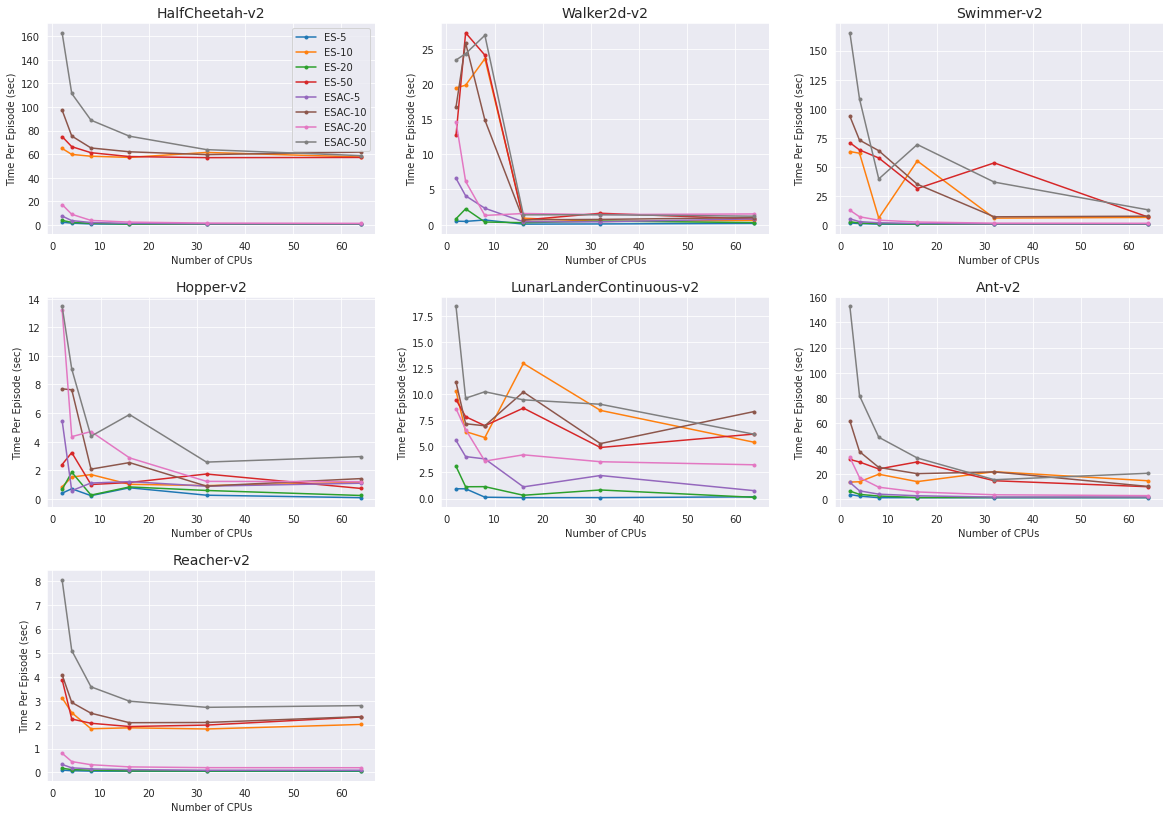

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

checkpoint_name = '/content/drive/My Drive/Colab Notebooks/Checkpoint/'
es_name = '/content/drive/My Drive/Colab Notebooks/Checkpoint/Scalability/ES/'
esac_name = '/content/drive/My Drive/Colab Notebooks/Checkpoint/Scalability/ESAC/'
sns.set_style('dark', {'axes.grid' : True})


cpu_list = [2,4,8,16,32,64]
pop_list = [5,10,20,50]

env_list = ['HalfCheetah-v2','Walker2d-v2','Swimmer-v2','Hopper-v2','LunarLanderContinuous-v2', 'Ant-v2', 'Reacher-v2']
sns.set_style('dark', {'axes.grid' : True})
alpha = 0.2
avg = 100
fig = plt.figure(figsize=(20,24))
fig.subplots_adjust(hspace=0.3)
num_plots = 2*len(env_list)

count = 0
for env_name in env_list:
  count += 1
  for pop in range(0,len(pop_list)):
    plot_list = []
    plot_list_esac = []
    for cpu in range(0,len(cpu_list)):
      data_es = pkl.load(open(es_name+'/'+str(env_name)+'/'+str(cpu_list[cpu])+'_'+str(pop_list[pop])+'.pkl','rb'))
      data_esac = pkl.load(open(esac_name+'/'+str(env_name)+'/data'+str(cpu_list[cpu])+str(pop_list[pop])+'.pkl','rb'))
      time = np.mean(data_es['time'][-10:])
      time_esac = np.mean(data_esac['time'][-10:])
      plot_list.append(time)
      plot_list_esac.append(time_esac)
    plt.subplot(5,3,count)
    plt.plot(cpu_list, plot_list, marker='.')
    plt.plot(cpu_list, plot_list_esac, marker='.')
  plt.title(env_name, fontsize=14)
  if env_name=='HalfCheetah-v2':
    plt.legend(['ES-5','ES-10','ES-20','ES-50','ESAC-5','ESAC-10','ESAC-20','ESAC-50'])

  plt.xlabel('Number of CPUs')
  plt.ylabel('Time Per Episode (sec)')

plt.savefig(checkpoint_name+'scale.png')
